In [11]:
import scipy.stats as sps
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

Будем использовать в качестве априорного распределения $N(0, 0.25^2)$

In [12]:
distr = sps.norm(0, 0.25)
print distr.ppf(0.025)
print distr.ppf(0.975)

-0.489990996135
0.489990996135


In [28]:
np.random.seed(seed=2)
sample = sps.cauchy(0, 1).rvs(100)

In [29]:
def bayes_estimation(loc, scale, X, sigma):
    return (loc / (scale**2.) + np.sum(X) / (sigma**2.)) / (1  / (scale**2.) + len(X) / (sigma**2.))

In [30]:
y = []
for i in range(100):
    y.append(abs(bayes_estimation(0, 0.25, sample[:i + 1], 1)))

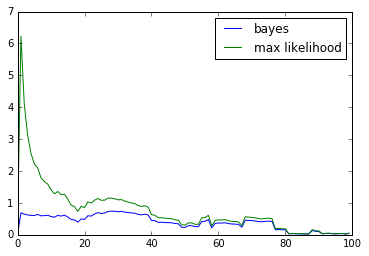

In [31]:
plt.plot(range(100), y, label = 'bayes')
plt.plot(range(100), [abs(np.mean(sample[:i + 1])) for i in range(100)], label = 'max likelihood')
plt.legend(loc = 'best')
plt.show()

Видно, что байесовская оценка оказалась лучше, причем при небольших размерах выборки (~10) разница достаточно велика